# Data Science 325

## Neural net introduction - hw

### Learning Objectives:

* Students will learn the motivation for neural networks.
* Students will practice the application of these techniques and visualize their results

## Exercise 1: Fully Connected Neural Network on MNIST

Build and compile a basic model and explore how the number of neurons in the hidden layer $d_1$ affect performance.

#### Layers for our Network.

* **Input layer** - size 784 
    * flatten the input image (28x28).
* **Hidden layer** - number of neurons $d_1$, this is what we will explore in this hw
    * Dense (fully connected) network from input layer to these 128 neuron hidden layer.
* **Dropout** - 0.2
    * randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
* **Output layer** - size 10
    * Dense layer (fully connected back to the 128 neuron hidden layer). The 10 is the number of classes.  Given an input image, our network should **light** up the corresponding neuron of our target.
* **Softmax activation** - convert our output into a probability for each class.

#### define our optimizer
We will use stochast gradient descent with the following parameters
* Learning rate $\alpha = 0.1$
* Momentum $\beta = 0.9$

#### Run
* Minibatch size $B = 300$.
* Run for 20 epochs.
* Split the training set into training and validation components, with 20% of the 60000 training examples used for validation. 


#### Report the following
* One figure that displays the training loss and validation loss versus the epoch number.  Include the final test loss which should be displayed as a horizontal line.
* The total wall-clock time used by the training algorithm.

# Exercises
We are going to explore how the size of the hidden layer changes the performance of our network.  We will train 4 networks where the hidden layer has

1. 10 neurons
2. 20 neurons
3. 100 neurons
4. 1000 neurons


## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
plt.rcParams["figure.figsize"] = [9.708,6]
import warnings
warnings.filterwarnings('ignore')
#this is our new one
import tensorflow as tf
from tensorflow.keras.datasets import mnist
tf.random.set_seed(0)
np.random.seed(0)

In [2]:
# set our batch size and # of epochs
batch_size = 300   # during training to find the gradient
epochs     = 20    # how long to train

### Load the data

In [3]:
num_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
input_shape= (X_train.shape[1],X_train.shape[2])
#normalize the data between 0-1
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype( 'float32') / 255
#Reshape To Match The Keras's Expectations
X_train = X_train.reshape(X_train.shape[0], 1, input_shape[0], input_shape[1])
X_test  = X_test.reshape( X_test.shape[0],  1, input_shape[0], input_shape[1])
#one hot encoding
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)
#==============
print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')

11501568/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


### Optimizer & FunctionsFunctions

In [4]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')

In [5]:
def printAccuracy(history,results_test):
    print("train loss %.5f \t train acc: %.5f"%(history.history['loss'][-1],history.history['accuracy'][-1]))
    print("valid loss %.5f \t valid acc: %.5f"%(history.history['val_loss'][-1],history.history['val_accuracy'][-1]))
    print("test loss  %.5f \t test acc:  %.5f"%(results_test[0],results_test[1]))

In [6]:
#we will do this a lot, so lets make a function for this
def plot_result(history,results_test):
    # Get training and validation histories
    training_acc = history.history['accuracy']
    val_acc      = history.history['val_accuracy']
    # Create count of the number of epochs
    epoch_count = range(1, len(training_acc) + 1)
    # Visualize loss history
    plt.plot(epoch_count, training_acc, 'b-o',label='Training')
    plt.plot(epoch_count, val_acc, 'r--',label='Validation')
    plt.plot(epoch_count, results_test[1]*np.ones(len(epoch_count)),'k--',label='Test')
    plt.legend()
    plt.title("Training and validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

## Exercise 1a: hidden layer; $d_1=10$

### Build our model

In [7]:
X_train[1].shape

(1, 28, 28)

In [8]:
d1= 10
model_10 = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Flatten(input_shape=X_train[1].shape),  # input layer
  tf.keras.layers.Dense(d1, activation='relu'),   # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),                      # output to each class, could just stop here
  tf.keras.layers.Softmax()                       # convert to probability
])

In [9]:
model_10.compile(optimizer=sgd,
              loss='categorical_crossentropy', #need to define our loss function
              metrics=['accuracy'])

### Train the model

In [10]:
tstart = tf.timestamp()
history = model_10.fit(X_train, Y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/20
160/160 [==============================] - 1s 4ms/step - loss: 1.0567 - accuracy: 0.6402 - val_loss: 0.4723 - val_accuracy: 0.8753
Epoch 2/20
160/160 [==============================] - 1s 4ms/step - loss: 0.7992 - accuracy: 0.7371 - val_loss: 0.4486 - val_accuracy: 0.8804
Epoch 3/20
160/160 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.7425 - val_loss: 0.4534 - val_accuracy: 0.8886
Epoch 4/20
160/160 [==============================] - 1s 3ms/step - loss: 0.7167 - accuracy: 0.7642 - val_loss: 0.3807 - val_accuracy: 0.8984
Epoch 5/20
160/160 [==============================] - 1s 3ms/step - loss: 0.6778 - accuracy: 0.7757 - val_loss: 0.4007 - val_accuracy: 0.8936
Epoch 6/20
160/160 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.7791 - val_loss: 0.3674 - val_accuracy: 0.8996
Epoch 7/20
160/160 [==============================] - 1s 3ms/step - loss: 0.6486 - accuracy: 0.7862 - val_loss: 0.3719 - val_accuracy: 0.9013
Epoch 

### plot training and test accuracy per epoch

In [11]:
results_test = model_10.evaluate(X_test, Y_test, batch_size=128,verbose=0)
printAccuracy(history,results_test)

train loss 0.55340 	 train acc: 0.82610
valid loss 0.31516 	 valid acc: 0.91067
test loss  0.32466 	 test acc:  0.91210


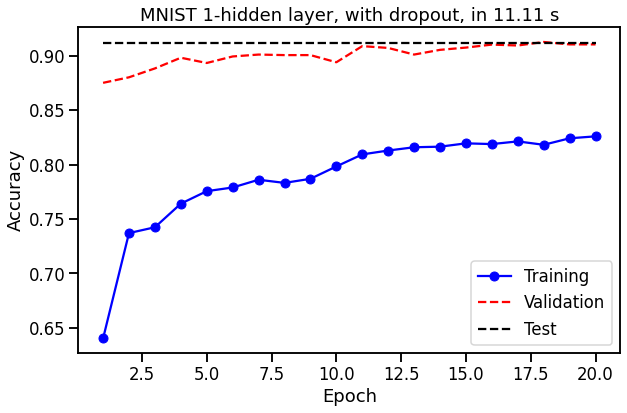

In [12]:
plot_result(history,results_test)
plt.title("MNIST 1-hidden layer, with dropout, in %3.2f s"%(total_time)) #overwrite the title 
plt.show()

## Exercise 1b: hidden layer; $d_1=20$

### Build our model

In [13]:
d1= 20
model_20 = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Flatten(input_shape=X_train[1].shape),  # input layer
  tf.keras.layers.Dense(d1, activation='relu'),   # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),                      # output to each class, could just stop here
  tf.keras.layers.Softmax()                       # convert to probability
])

model_20.compile(optimizer=sgd,
              loss='categorical_crossentropy', #need to define our loss function
              metrics=['accuracy'])

### Train the model

In [14]:
tstart = tf.timestamp()
history = model_20.fit(X_train, Y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/20
160/160 [==============================] - 1s 5ms/step - loss: 0.6802 - accuracy: 0.7805 - val_loss: 0.2684 - val_accuracy: 0.9236
Epoch 2/20
160/160 [==============================] - 1s 4ms/step - loss: 0.3962 - accuracy: 0.8799 - val_loss: 0.2275 - val_accuracy: 0.9334
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8921 - val_loss: 0.2031 - val_accuracy: 0.9404
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.8988 - val_loss: 0.1993 - val_accuracy: 0.9390
Epoch 5/20
160/160 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.9024 - val_loss: 0.1928 - val_accuracy: 0.9454
Epoch 6/20
160/160 [==============================] - 1s 4ms/step - loss: 0.3024 - accuracy: 0.9041 - val_loss: 0.1800 - val_accuracy: 0.9477
Epoch 7/20
160/160 [==============================] - 1s 4ms/step - loss: 0.2955 - accuracy: 0.9073 - val_loss: 0.1787 - val_accuracy: 0.9482
Epoch 

### plot training and test accuracy per epoch

train loss 0.24743 	 train acc: 0.92173
valid loss 0.16090 	 valid acc: 0.95383
test loss  0.16110 	 test acc:  0.95290


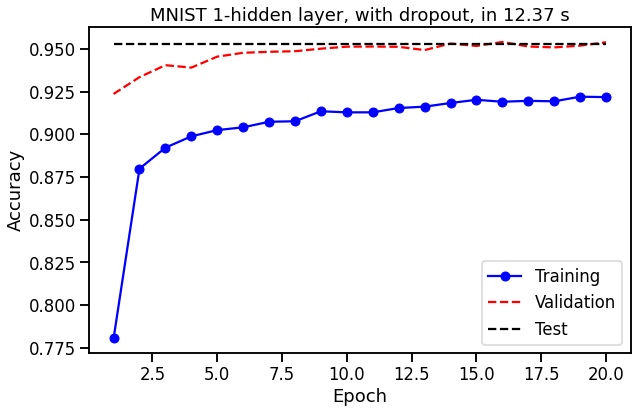

In [15]:
results_test = model_20.evaluate(X_test, Y_test, batch_size=128,verbose=0)
printAccuracy(history,results_test)

plot_result(history,results_test)
plt.title("MNIST 1-hidden layer, with dropout, in %3.2f s"%(total_time)) #overwrite the title 
plt.show()

## Exercise 1c: hidden layer; $d_1=100$

### Build our model

In [16]:
d1= 100
model_100 = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Flatten(input_shape=X_train[1].shape),  # input layer
  tf.keras.layers.Dense(d1, activation='relu'),   # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),                      # output to each class, could just stop here
  tf.keras.layers.Softmax()                       # convert to probability
])

model_100.compile(optimizer=sgd,
              loss='categorical_crossentropy', #need to define our loss function
              metrics=['accuracy'])

### Train the model

In [17]:
tstart = tf.timestamp()
history = model_100.fit(X_train, Y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/20
160/160 [==============================] - 1s 6ms/step - loss: 0.4504 - accuracy: 0.8644 - val_loss: 0.1937 - val_accuracy: 0.9451
Epoch 2/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2086 - accuracy: 0.9390 - val_loss: 0.1446 - val_accuracy: 0.9579
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1651 - accuracy: 0.9503 - val_loss: 0.1224 - val_accuracy: 0.9649
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.9594 - val_loss: 0.1112 - val_accuracy: 0.9673
Epoch 5/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9639 - val_loss: 0.1035 - val_accuracy: 0.9704
Epoch 6/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1067 - accuracy: 0.9678 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 7/20
160/160 [==============================] - 1s 4ms/step - loss: 0.0959 - accuracy: 0.9710 - val_loss: 0.0968 - val_accuracy: 0.9708
Epoch 

### plot training and test accuracy per epoch

train loss 0.04808 	 train acc: 0.98452
valid loss 0.08150 	 valid acc: 0.97808
test loss  0.07339 	 test acc:  0.97830


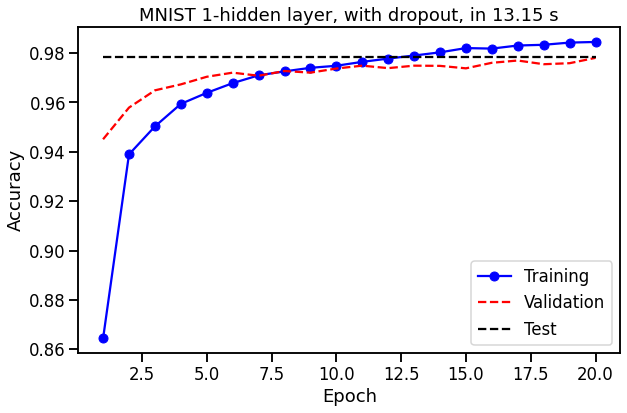

In [18]:
results_test = model_100.evaluate(X_test, Y_test, batch_size=128,verbose=0)
printAccuracy(history,results_test)

plot_result(history,results_test)
plt.title("MNIST 1-hidden layer, with dropout, in %3.2f s"%(total_time)) #overwrite the title 
plt.show()

## Exercise 1d: hidden layer; $d_1=1000$

### Build our model

In [19]:
d1= 1000
model_1000 = tf.keras.models.Sequential([              # model type
  tf.keras.layers.Flatten(input_shape=X_train[1].shape),  # input layer
  tf.keras.layers.Dense(d1, activation='relu'),   # hidden layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),                      # output to each class, could just stop here
  tf.keras.layers.Softmax()                       # convert to probability
])

model_1000.compile(optimizer=sgd,
              loss='categorical_crossentropy', #need to define our loss function
              metrics=['accuracy'])

### Train the model

In [20]:
tstart = tf.timestamp()
history = model_1000.fit(X_train, Y_train, 
                    epochs=epochs,batch_size=batch_size,
                    validation_split = 0.2) # Data for evaluation
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/20
160/160 [==============================] - 3s 15ms/step - loss: 0.3667 - accuracy: 0.8914 - val_loss: 0.1686 - val_accuracy: 0.9512
Epoch 2/20
160/160 [==============================] - 2s 14ms/step - loss: 0.1473 - accuracy: 0.9578 - val_loss: 0.1213 - val_accuracy: 0.9660
Epoch 3/20
160/160 [==============================] - 2s 14ms/step - loss: 0.1040 - accuracy: 0.9700 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 4/20
160/160 [==============================] - 2s 14ms/step - loss: 0.0799 - accuracy: 0.9769 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 5/20
160/160 [==============================] - 2s 14ms/step - loss: 0.0656 - accuracy: 0.9816 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 6/20
160/160 [==============================] - 2s 14ms/step - loss: 0.0538 - accuracy: 0.9842 - val_loss: 0.0764 - val_accuracy: 0.9772
Epoch 7/20
160/160 [==============================] - 2s 14ms/step - loss: 0.0435 - accuracy: 0.9883 - val_loss: 0.0729 - val_accuracy: 0.9780

### plot training and test accuracy per epoch

train loss 0.00835 	 train acc: 0.99888
valid loss 0.06256 	 valid acc: 0.98317
test loss  0.05440 	 test acc:  0.98270


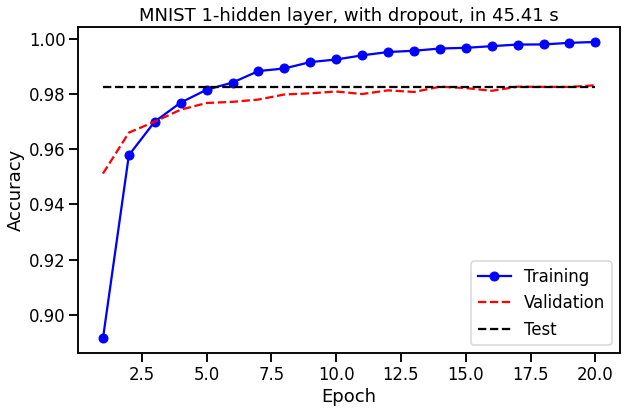

In [21]:
results_test = model_1000.evaluate(X_test, Y_test, batch_size=128,verbose=0)
printAccuracy(history,results_test)

plot_result(history,results_test)
plt.title("MNIST 1-hidden layer, with dropout, in %3.2f s"%(total_time)) #overwrite the title 
plt.show()

## Summary of Exercises 1

Complete the following table to help summarize your findings for the 1-hidden layer MNIST classifier.


| Number of hidden neurons | Train Accuracy | Validation Accuracy | Test Accuracy | 
| - | - | - | - |
| 10 | 0.82610 | 0.91067 | 0.91210 |
| 20 | 0.92173 | 0.95383 | 0.95290 |
| 100 | 0.98452 | 0.97775 | 0.97870 |
| 1000 | 0.99894 | 0.98333 | 0.98260 |

#### Questions
1. Why is the validation accuracy higher than training accuracy for $d_1 = 10$ and 20?  Why is training accuracy better than validation for $d_1=100$ and $1000$?

  - validation accuracy higher than training accuracy for $d_1 = 10$ and $20$ since the model is not trained enough
  - training accuracy better than validation for $d_1=100$ and $1000$ since the model is trained so many times that it remembers the data, which means that it is overfitting

2. Don't try this, but from your results, predict what accuracy would be for a NN with 10000 neurons.  Estimate the :
* train: around 1
* valid: close to 1
* test: close to 1

  -Reason: from the table, I find that as number of hidden neurons increases, that accuracy increases also. Thus, if there are 10,000 neurons, the model may remember the train data as you said, so the accuracy may be 1

## Exercise 2: online MNIST classifier 
[https://www.cs.ryerson.ca/~aharley/vis/fc/](https://www.cs.ryerson.ca/~aharley/vis/fc/)

Go to the link below.  Draw some numbers and see what the model predicts.  

* Can you write a number that isn't accurately predicted?

  - Yes

* Why do you think it was misidentified?

  - My numbers are confusing to machine: e.g.: 1 looks like 7, 0 looks like 6
  - Different style of writing a number: e.e.: number 7 (https://www.quora.com/Why-do-some-people-write-the-number-seven-as-7-with-a-small-horizontal-line-in-the-middle)

* What could you try to do to make the network accuracy improve?  Be specific. 

  - Create more images to train model (for cases like different ways to write number 7)
  - Dropout to prevent overfitting

## Exercise 3: Short answer questions

1. Name three popular activation functions.

  - sigmoid, tanh, relu

2. How many neurons do you need in the output layer if want to classify email into **spam** and **not-spam**?  What activation function should you use?

  - 1 output neuron and use sigmoid funcion since the output needs 0 and 1 only

3. T/F. For any neural network, the training error must always decrease monotonically (never increasing) when using SGD, provided the step size is sufficiently small (assume the step size is constant).  Give justification for your answer.

  - True. Because the more we train, the more it fits the training dataset, which results in smaller training error

4. T/F. For any network, the validation error must always decrease monotonically (never increases), provided the step size is sufficiently small.  Give justification for your answer.

  - False. As we continue training the model, the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. To prevent that, we should stop training when the error is below a threshold (this method is called [Early Stopping](https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd))